In [1]:
# 2학기 진동섭 교수님 // 수학적으로 많이 배운다..

# CNN의 장점 : 지역적인 특성을 뽑을 수 있다. 파라미터 수를 줄인다.

In [2]:
# DNN
# CNN

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

p = pd.read_csv('./mnist.csv', dtype=np.float32)
p

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
features = p.drop(columns=['label'], axis=1).values/255
label = p['label'].values

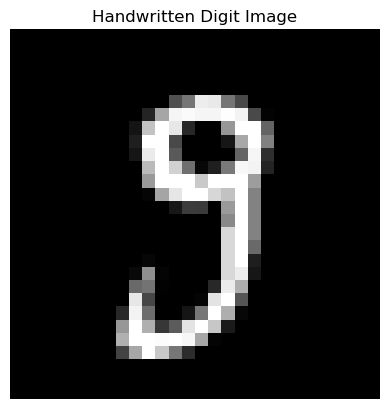

In [21]:
# visualize the dataset
import matplotlib.pyplot as plt

inx = 40
data = p.iloc[inx].to_numpy()
data = data[1:].reshape(28,28)
plt.imshow(data, cmap='gray')
plt.axis("off")
plt.title("Handwritten Digit Image")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split


# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [4]:
print(x_train)
print(x_train.shape)
print(x_test)
print(x_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(33600, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8400, 784)


In [5]:
print(y_train)
print(y_train.shape)
print(y_test)
print(y_test.shape)

[6. 5. 3. ... 2. 6. 0.]
(33600,)
[8. 1. 9. ... 3. 0. 9.]
(8400,)


In [9]:
# pytorch 데이터로더를 사용하지 않고 바로 불러오기

import time
import math

start = time.time()

batch_size = 64
data_len = len(x_train)
for i in range(0,data_len-batch_size,batch_size):
    j = i+batch_size if i+batch_size<=data_len else data_len
    
    batch_x = torch.FloatTensor(x_train[i:j,:])
    batch_x = batch_x.view(-1,28,28)
    batch_y = torch.LongTensor(y_train[i:j])
    
end = time.time()
print(f'{end-start:.5f} sec')

0.05318 sec


In [10]:
# pytorch 데이터로더 사용하기

from torch.utils.data import DataLoader, Dataset

class custom_data(Dataset):
  def __init__(self, data, targets):
    self.x = data
    self.y = targets

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    x = torch.FloatTensor(self.x[index])
    x = x.view(-1, 28*28)
    y = self.y[index]

    return x, y
  
trainset_custom = custom_data(x_train, y_train)
batch = 64
trainloader1 = DataLoader(trainset_custom, batch_size = batch, shuffle=True)

images, label = next(iter(trainloader1))


In [11]:
start = time.time()
bin = 0
for batch, target in trainloader1:
    continue
    
end = time.time()
print(f'{end-start:.5f} sec')

0.43494 sec


In [12]:
# 특별한 데이터 처리를 요구하지 않을 때 pytorch 를 이용한 방법

tr_x = torch.from_numpy(x_train)
tr_y = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

train = torch.utils.data.TensorDataset(tr_x,tr_y)

trainloader = DataLoader(train, batch_size = batch_size, shuffle = True)
img, label = next(iter(trainloader))

In [13]:
start = time.time()
bin = 0
for batch, target in trainloader:
    continue
    
end = time.time()
print(f'{end-start:.5f} sec')

0.28836 sec


In [14]:
# tqdm을 이용한 방법

from tqdm import tqdm

start = time.time()
bin = 0
for i, (batch, target) in enumerate(tqdm(trainloader)):
    continue
    
end = time.time()
print(f'{end-start:.5f} sec')

100%|██████████| 525/525 [00:00<00:00, 1784.86it/s]


0.30283 sec


In [32]:
import torch.nn.functional as F 

class myModel(nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)

        out = self.fc5(x)        # 마지막에 activation Func.을 쓰지 않는 이유 : ReLU에 softmax가 구현 되어 있기 때문에 (나중에 crossentropyloss를 쓰기 위함)
        return out
    
model = myModel()
print(model)

myModel(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)


In [33]:
from torchsummary import summary
# 입력의 크기를 넣어줘야 함
summary(model, (1, 784), device = 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         401,920
            Linear-2               [-1, 1, 256]         131,328
            Linear-3               [-1, 1, 128]          32,896
            Linear-4                [-1, 1, 64]           8,256
            Linear-5                [-1, 1, 10]             650
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.19
Estimated Total Size (MB): 2.20
----------------------------------------------------------------


In [34]:
# 데이터 로더 만들기
from torch.utils.data import DataLoader

tr_x = torch.from_numpy(x_train)
tr_y = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

te_x = torch.from_numpy(x_test)
te_y = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

train = torch.utils.data.TensorDataset(tr_x,tr_y)
test = torch.utils.data.TensorDataset(te_x,te_y)

# data loader
batch_size = 64
trainloader = DataLoader(train, batch_size = batch_size, shuffle = True)
testloader  = DataLoader(test, batch_size = batch_size, shuffle = False)


In [35]:
# hyperparameters 설정

epochs = 25
lr = 0.001
train_loss, test_loss = [], []
steps = 5

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [36]:
for epoch in range(epochs):
    total_loss = 0
    for i, (images, label) in enumerate(tqdm(trainloader)):
        outputs = model(images)
        loss = criterion(outputs, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if epoch % steps == 0:
        te_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for j, (images, label) in enumerate(testloader):
                outputs = model(images)
                te_loss += criterion(outputs, label)
        train_loss.append(total_loss / len(trainloader))
        test_loss.append(te_loss / len(testloader))

        model.train()

        print("Epoch: {}/{}.. ".format(epoch, epochs),
                "Training Loss: {:.3f}.. ".format(train_loss[-1]),
                "Test Loss: {:.3f}.. ".format(test_loss[-1]))

100%|██████████| 525/525 [00:04<00:00, 108.43it/s]


Epoch: 0/25..  Training Loss: 0.404..  Test Loss: 0.171.. 


100%|██████████| 525/525 [00:04<00:00, 113.84it/s]


Epoch: 5/25..  Training Loss: 0.043..  Test Loss: 0.117.. 


100%|██████████| 525/525 [00:05<00:00, 95.30it/s] 


Epoch: 10/25..  Training Loss: 0.021..  Test Loss: 0.164.. 


100%|██████████| 525/525 [00:04<00:00, 112.84it/s]


Epoch: 15/25..  Training Loss: 0.013..  Test Loss: 0.127.. 


100%|██████████| 525/525 [00:04<00:00, 112.07it/s]


Epoch: 20/25..  Training Loss: 0.016..  Test Loss: 0.124.. 


100%|██████████| 525/525 [00:04<00:00, 113.90it/s]


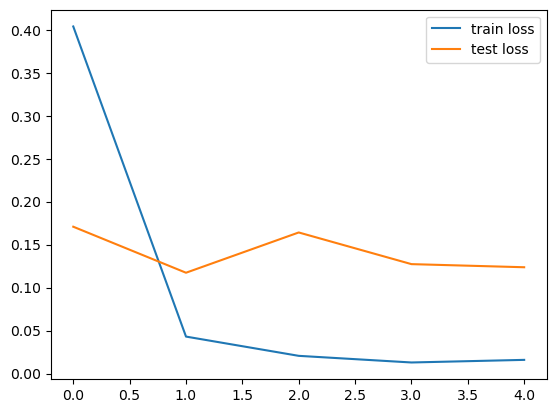

In [37]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

model.eval()

acc = 0
for j, (images, label) in enumerate(testloader):
    outputs = model(images)
    acc += accuracy_score(label, torch.argmax(outputs, axis=1))
    
acc = acc/(j+1)
print("accuracy : %0.3f" % (acc * 100))

accuracy : 97.064


In [22]:
# nn.Linear(a, b)     // DNN
# nn.Conv2D(in_channels, out_channels, kernel_size, ~ ~ ~ )         // CNN
# 
# DNN에서 a, b 는 입력, 출력
# CNN에서 a, b 는 입력 채널, 출력 채널  // CNN에서 채널은 Color // c는 filter의 사이즈 = weight (=3 이면 3x3, (5,2)이면 5x2로 처리)

In [11]:
import torch.nn.functional as F

class Classifier_cnn(nn.Module):
    def __init__(self):
        super().__init__()

        self.cnn1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.cnn2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)

        self.cnn3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.cnn4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        self.mp = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)               # reshape (1, 784) => (28, 28)
        x = F.relu(self.cnn1(x))
        x = self.mp(F.relu(self.cnn2(x)))

        x = F.relu(self.cnn3(x))
        x = self.mp(F.relu(self.cnn4(x)))

        x = x.view(-1, 64*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x
    

model = Classifier_cnn()

In [12]:
print(model)

Classifier_cnn(
  (cnn1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [13]:
from torchsummary import summary
summary(model, (1, 784), device = 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 32, 28, 28]           9,248
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
            Conv2d-5           [-1, 64, 14, 14]          36,928
         MaxPool2d-6             [-1, 64, 7, 7]               0
            Linear-7                  [-1, 128]         401,536
            Linear-8                   [-1, 10]           1,290
Total params: 467,818
Trainable params: 467,818
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.65
Params size (MB): 1.78
Estimated Total Size (MB): 2.43
----------------------------------------------------------------


In [14]:
# hyperparameter setting & initialize loss function and model

epochs = 25
lr = 0.001
train_loss, test_loss = [], []
steps = 5

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [18]:
from tqdm import tqdm

for epoch in range(epochs):
    total_loss = 0
    for i, (images, label) in enumerate(tqdm(trainloader)):
        outputs = model(images)
        loss = criterion(outputs, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if epoch % steps == 0:
        te_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for j, (images, label) in enumerate(testloader):
                outputs = model(images)
                te_loss += criterion(outputs, label)
        train_loss.append(total_loss / len(trainloader))
        test_loss.append(te_loss / len(testloader))

        model.train()

        print("Epoch: {}/{}.. ".format(epoch, epochs),
                "Training Loss: {:.3f}.. ".format(train_loss[-1]),
                "Test Loss: {:.3f}.. ".format(test_loss[-1]))

100%|██████████| 525/525 [00:28<00:00, 18.50it/s]


Epoch: 0/25..  Training Loss: 0.231..  Test Loss: 0.085.. 


100%|██████████| 525/525 [00:28<00:00, 18.14it/s]


Epoch: 5/25..  Training Loss: 0.017..  Test Loss: 0.040.. 


100%|██████████| 525/525 [00:28<00:00, 18.12it/s]


Epoch: 10/25..  Training Loss: 0.011..  Test Loss: 0.051.. 


100%|██████████| 525/525 [00:27<00:00, 18.78it/s]


Epoch: 15/25..  Training Loss: 0.006..  Test Loss: 0.048.. 


100%|██████████| 525/525 [00:27<00:00, 19.18it/s]


Epoch: 20/25..  Training Loss: 0.004..  Test Loss: 0.060.. 


100%|██████████| 525/525 [00:27<00:00, 19.31it/s]


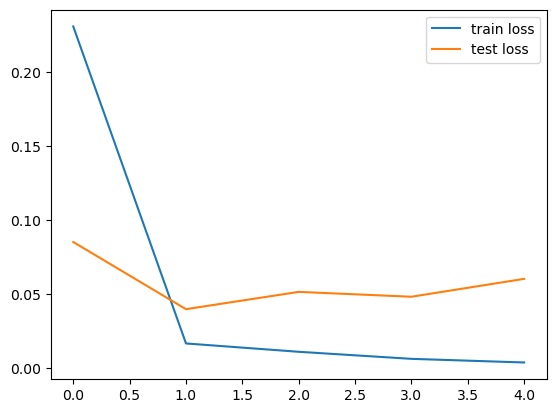

In [22]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

model.eval()

acc = 0
for j, (images, label) in enumerate(testloader):
    outputs = model(images)
    acc += accuracy_score(label, torch.argmax(outputs, axis=1))
    
acc = acc/(j+1)
print("accuracy : %0.3f" % (acc * 100))

accuracy : 99.053
